<a href="https://colab.research.google.com/github/didulanthaisuru/time_series_forecasting/blob/main/colab_TFT_with_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
# prompt: config google drive correclty

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

dp='/content/drive/MyDrive/Colab Notebooks'
files=os.listdir(dp)
print(files)

['lstm.ipynb', 'cluster3_payments_only.csv', 'n_beats.ipynb', '.ipynb_checkpoints', 'n_beats_for_cluster threeipynb.ipynb', 'dataset_with_zeros.csv', 'colab_n_beats_modarate.ipynb', 'Untitled0.ipynb', 'nadil_category_expenses.xlsx', 'Untitled1.ipynb']


In [4]:

file_path='/content/drive/MyDrive/Colab Notebooks/nadil_category_expenses.xlsx'

In [5]:
import pandas as pd

df = pd.read_excel(file_path, engine='openpyxl')

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df=df.sort_values('Date').reset_index(drop=True)

In [8]:
df.head()

,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster
0,2022-11-06,t ahirt OTHBNK T,6030.0,NaN,12454.64,t ahirt othbnk t,NADIL OTHBNK T,0
1,2022-11-06,010001088282101 OTHBNK T,3030.0,NaN,9424.64,010001088282101 othbnk t,OTHBNK T,1
2,2022-11-15,RIB/RMB SE.CH 20 IBMB Chg,25.0,NaN,9399.64,rib/rmb se.ch 20 ibmb charge,RIBRMB SECH IBMB CHARGE,2
3,2022-11-18,nadil Siriwardha MB SA TF,450.0,NaN,11537.14,nadil siriwardha mb sa tf,NADIL OTHBNK T,0
4,2022-12-24,nadil OTHBNK T,7530.0,NaN,27264.90,nadil othbnk t,NADIL OTHBNK T,0


In [9]:
print(df.isnull().sum())

Date                     0
Discription              0
Payments                 0
Receipts               521
Balance                  0
cleaned_particulars      0
Category                 0
Cluster                  0
dtype: int64


In [10]:
df[['Payments','Balance']]=df[['Payments','Balance']].fillna(method='ffill')

<ipython-input-10-f7156b4b8177>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['Payments','Balance']]=df[['Payments','Balance']].fillna(method='ffill')


In [11]:
print(df.isnull().sum())

Date                     0
Discription              0
Payments                 0
Receipts               521
Balance                  0
cleaned_particulars      0
Category                 0
Cluster                  0
dtype: int64


In [12]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['days_of_week']=df['Date'].dt.dayofweek #monday-0,sunday=6

In [13]:

df['prev_balance']=df['Balance'].shift(1)

In [14]:
df.head()

,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster,year,month,day,days_of_week,prev_balance
0,2022-11-06,t ahirt OTHBNK T,6030.0,NaN,12454.64,t ahirt othbnk t,NADIL OTHBNK T,0,2022,11,6,6,NaN
1,2022-11-06,010001088282101 OTHBNK T,3030.0,NaN,9424.64,010001088282101 othbnk t,OTHBNK T,1,2022,11,6,6,12454.64
2,2022-11-15,RIB/RMB SE.CH 20 IBMB Chg,25.0,NaN,9399.64,rib/rmb se.ch 20 ibmb charge,RIBRMB SECH IBMB CHARGE,2,2022,11,15,1,9424.64
3,2022-11-18,nadil Siriwardha MB SA TF,450.0,NaN,11537.14,nadil siriwardha mb sa tf,NADIL OTHBNK T,0,2022,11,18,4,9399.64
4,2022-12-24,nadil OTHBNK T,7530.0,NaN,27264.90,nadil othbnk t,NADIL OTHBNK T,0,2022,12,24,5,11537.14


In [15]:
df['rolling_payments']=df['Payments'].rolling(window=7,min_periods=1).mean()

In [16]:
df=df.fillna(method='bfill')

<ipython-input-16-21c55c872ede>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='bfill')


In [17]:
df.head()

,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster,year,month,day,days_of_week,prev_balance,rolling_payments
0,2022-11-06,t ahirt OTHBNK T,6030.0,NaN,12454.64,t ahirt othbnk t,NADIL OTHBNK T,0,2022,11,6,6,12454.64,6030.000000
1,2022-11-06,010001088282101 OTHBNK T,3030.0,NaN,9424.64,010001088282101 othbnk t,OTHBNK T,1,2022,11,6,6,12454.64,4530.000000
2,2022-11-15,RIB/RMB SE.CH 20 IBMB Chg,25.0,NaN,9399.64,rib/rmb se.ch 20 ibmb charge,RIBRMB SECH IBMB CHARGE,2,2022,11,15,1,9424.64,3028.333333
3,2022-11-18,nadil Siriwardha MB SA TF,450.0,NaN,11537.14,nadil siriwardha mb sa tf,NADIL OTHBNK T,0,2022,11,18,4,9399.64,2383.750000
4,2022-12-24,nadil OTHBNK T,7530.0,NaN,27264.90,nadil othbnk t,NADIL OTHBNK T,0,2022,12,24,5,11537.14,3413.000000


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()
df['Category_encode']=le.fit_transform(df['Category'])

In [20]:
category_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
print("Category Mapping:",category_mapping)

Category Mapping: {'AB ATM WITHDRAWALNOV': np.int64(0), 'ATM WITHDRAWAL WDR': np.int64(1), 'BILL PAYMENT': np.int64(2), 'CSH WDR': np.int64(3), 'FUND TRANSFER': np.int64(4), 'NADIL OTHBNK T': np.int64(5), 'OTHBNK T': np.int64(6), 'POINT OF SALE TRNS': np.int64(7), 'RB RCD VSA': np.int64(8), 'RIBRMB SECH  IBMB CHARGE': np.int64(9), 'SMSSERVICECHARGE IBMB CHARGE': np.int64(10), 'Uncategorized': np.int64(11), 'WH TAX': np.int64(12)}


In [21]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

num_cols=['Payments','Balance','prev_balance','rolling_payments']
df[num_cols]=scaler.fit_transform(df[num_cols])

In [22]:

# Convert 'Payments' and 'Balance' columns to numeric, handling non-numeric values
for col in ['Payments', 'Balance']:
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [23]:
# Select numerical columns to scale
num_cols = ['Payments', 'Balance', 'prev_balance', 'rolling_payments']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [24]:
split_date=pd.Timestamp('2024-09-20')
train_df=df[df['Date']<split_date]
test_df=df[df['Date']>=split_date]

In [25]:
print("Train shape:",train_df.shape)
print("Test shape:",test_df.shape)

Train shape: (425, 15)
Test shape: (96, 15)


In [26]:
import numpy as np

In [27]:
def create_sequences(data, sequence_length=10, target_column='Payments'):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        seq_x = data.iloc[i:i+sequence_length].drop(columns=[target_column]).values
        seq_y = data.iloc[i+sequence_length][target_column]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Use the training DataFrame for sequence creation (adjust sequence length as needed)
X_train, y_train = create_sequences(train_df, sequence_length=10, target_column='Payments')

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (415, 10, 14)
y_train shape: (415,)


In [28]:
!pip install pandas numpy matplotlib seaborn

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df.head()

,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster,year,month,day,days_of_week,prev_balance,rolling_payments,Category_encode
0,2022-11-06,t ahirt OTHBNK T,1.677933,NaN,0.040719,t ahirt othbnk t,NADIL OTHBNK T,0,2022,11,6,6,0.039500,3.611196,5
1,2022-11-06,010001088282101 OTHBNK T,0.484599,NaN,-0.129910,010001088282101 othbnk t,OTHBNK T,1,2022,11,6,6,0.039500,2.321587,6
2,2022-11-15,RIB/RMB SE.CH 20 IBMB Chg,-0.710725,NaN,-0.131318,rib/rmb se.ch 20 ibmb charge,RIBRMB SECH IBMB CHARGE,2,2022,11,15,1,-0.131189,1.030545,9
3,2022-11-18,nadil Siriwardha MB SA TF,-0.541669,NaN,-0.010948,nadil siriwardha mb sa tf,NADIL OTHBNK T,0,2022,11,18,4,-0.132597,0.476371,5
4,2022-12-24,nadil OTHBNK T,2.274601,NaN,0.874735,nadil othbnk t,NADIL OTHBNK T,0,2022,12,24,5,-0.012186,1.361258,5


In [31]:
print(df.describe())

                                Date      Payments  Receipts       Balance  \
count                            521  5.210000e+02       0.0  5.210000e+02   
mean   2024-03-01 05:42:43.531669760 -2.727611e-17       NaN  2.727611e-17   
min              2022-11-06 00:00:00 -7.205779e-01       NaN -6.249917e-01   
25%              2023-10-09 00:00:00 -6.610026e-01       NaN -5.823399e-01   
50%              2024-03-02 00:00:00 -3.109578e-01       NaN -4.507913e-01   
75%              2024-07-31 00:00:00  1.643872e-01       NaN -1.207698e-02   
max              2025-01-31 00:00:00  7.712229e+00       NaN  3.570686e+00   
std                              NaN  1.000961e+00       NaN  1.000961e+00   

          Cluster         year       month         day  days_of_week  \
count  521.000000   521.000000  521.000000  521.000000    521.000000   
mean     6.523992  2023.641075    6.802303   15.992322      3.015355   
min     -1.000000  2022.000000    1.000000    1.000000      0.000000   
25%      

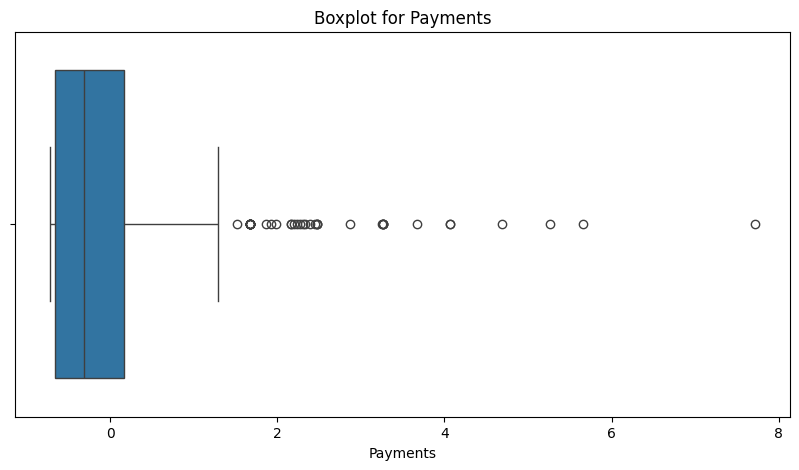

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["Payments"])
plt.title("Boxplot for Payments")
plt.show()

In [33]:
from scipy.stats import zscore

In [34]:
df["Payments_Z"]=zscore(df["Payments"])
outliers_z=df[np.abs(df["Payments_Z"])>3]
print("Outliers detected using z-score:\n",outliers_z)

Outliers detected using z-score:
           Date               Discription  Payments  Receipts   Balance  \
6   2022-12-28                   CSH WDR  3.257113       NaN  2.055626   
11  2023-01-31                   CSH WDR  7.712229       NaN  3.451088   
24  2023-03-06         0357AB01 ATM(NOV)  3.259102       NaN  2.544375   
25  2023-03-07  nadil , roshana OTHBNK T  4.064602       NaN  1.866925   
53  2023-07-03          0607029 Fund Trf  4.064602       NaN  1.203914   
61  2023-07-29  0004199071001696 ATM WDR  3.269046       NaN  2.214176   
67  2023-08-02  0004199071001696 ATM WDR  5.655715       NaN  1.276155   
101 2023-09-01          0934527 Fund Trf  3.666824       NaN -0.587551   
125 2023-10-05          0547036 Fund Trf  4.689910       NaN  0.957822   
136 2023-10-15          0696975 Fund Trf  5.257937       NaN -0.373989   
201 2024-01-02          0767639 Fund Trf  3.269046       NaN -0.571669   
240 2024-02-17          0493587 Fund Trf  3.269046       NaN -0.329209   

   

In [35]:
Q1=df["Payments"].quantile(0.25)
Q3=df["Payments"].quantile(0.75)
IQR=Q3-Q1

In [36]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [37]:
outliers_iqr=df[(df["Payments"]<lower_bound)| (df["Payments"]>upper_bound)]
print("Outliers detected using IQR\n",outliers_iqr)


Outliers detected using IQR
           Date                Discription  Payments  Receipts   Balance  \
0   2022-11-06           t ahirt OTHBNK T  1.677933       NaN  0.040719   
4   2022-12-24             nadil OTHBNK T  2.274601       NaN  0.874735   
6   2022-12-28                    CSH WDR  3.257113       NaN  2.055626   
11  2023-01-31                    CSH WDR  7.712229       NaN  3.451088   
20  2023-03-02  nadilsiriwardhan OTHBNK T  1.677933       NaN  3.231116   
21  2023-03-02       nadilroshan OTHBNK T  1.677933       NaN  2.891547   
22  2023-03-02      nadilsusindu OTHBNK T  1.677933       NaN  2.551977   
24  2023-03-06          0357AB01 ATM(NOV)  3.259102       NaN  2.544375   
25  2023-03-07   nadil , roshana OTHBNK T  4.064602       NaN  1.866925   
29  2023-04-05  nadilboardingFee OTHBNK T  1.677933       NaN  2.251538   
33  2023-05-07             nadil OTHBNK T  1.677933       NaN  2.197675   
51  2023-07-01           0995963 Fund Trf  1.677933       NaN  2.220933

In [38]:
df=df[(df["Payments"]>=lower_bound)&(df['Payments']<=upper_bound)]

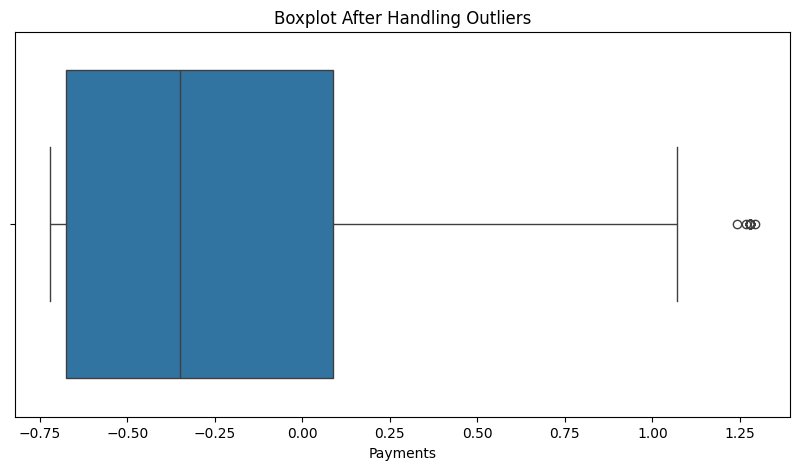

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["Payments"])
plt.title("Boxplot After Handling Outliers")
plt.show()

In [40]:
df.describe()

,Date,Payments,Receipts,Balance,Cluster,year,month,day,days_of_week,prev_balance,rolling_payments,Category_encode,Payments_Z
count,480,480.000000,0.0,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2024-03-12 00:42:00,-0.228443,NaN,-0.063280,6.650000,2023.666667,6.827083,16.656250,2.997917,-0.077216,-0.083962,3.300000,-0.228443
min,2022-11-06 00:00:00,-0.720578,NaN,-0.624992,-1.000000,2022.000000,1.000000,1.000000,0.000000,-0.626442,-1.490697,0.000000,-0.720578
25%,2023-10-21 12:00:00,-0.674229,NaN,-0.584654,6.000000,2023.000000,3.000000,8.750000,1.000000,-0.586090,-0.677614,1.000000,-0.674229
50%,2024-03-10 12:00:00,-0.350736,NaN,-0.473883,6.000000,2024.000000,7.000000,16.000000,3.000000,-0.476461,-0.278142,2.000000,-0.350736
75%,2024-08-13 18:00:00,0.086820,NaN,-0.119654,9.000000,2024.000000,10.000000,25.000000,5.000000,-0.157672,0.325825,4.000000,0.086820
max,2025-01-31 00:00:00,1.292088,NaN,3.570686,11.000000,2025.000000,12.000000,31.000000,6.000000,3.560699,4.248543,12.000000,1.292088
std,NaN,0.529880,NaN,0.946024,2.247337,0.575539,3.562929,9.290519,1.977429,0.931733,0.926343,3.234341,0.529880


In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose either MinMaxScaler or StandardScaler (Comment out the one you don't use)
scaler = MinMaxScaler()  # Scales values between 0 and 1
# scaler = StandardScaler()  # Mean = 0, Std = 1

# Scale relevant numerical columns
num_cols = ["prev_balance", "rolling_payments", "Payments_Z"]
df[num_cols] = scaler.fit_transform(df[num_cols])


In [42]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to 'Category_encode' and 'days_of_week'
le = LabelEncoder()
df["Category_encode"] = le.fit_transform(df["Category_encode"])
df["days_of_week"] = le.fit_transform(df["days_of_week"])


In [43]:
# Create lag features for payments (e.g., last transaction amount)
df["lag_1"] = df["rolling_payments"].shift(1)
df["lag_7"] = df["rolling_payments"].shift(7)  # Weekly patterns
df["lag_30"] = df["rolling_payments"].shift(30)  # Monthly patterns


In [44]:
# Rolling Mean (7-day & 30-day moving averages)
df["rolling_mean_7"] = df["rolling_payments"].rolling(window=7, min_periods=1).mean()
df["rolling_mean_30"] = df["rolling_payments"].rolling(window=30, min_periods=1).mean()


In [45]:
df.head()

,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster,year,month,...,days_of_week,prev_balance,rolling_payments,Category_encode,Payments_Z,lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30
1,2022-11-06,010001088282101 OTHBNK T,0.484599,NaN,-0.129910,010001088282101 othbnk t,OTHBNK T,1,2022,11,...,6,0.159044,0.664249,6,0.598796,NaN,NaN,NaN,0.664249,0.664249
2,2022-11-15,RIB/RMB SE.CH 20 IBMB Chg,-0.710725,NaN,-0.131318,rib/rmb se.ch 20 ibmb charge,RIBRMB SECH IBMB CHARGE,2,2022,11,...,1,0.118279,0.439299,9,0.004895,0.664249,NaN,NaN,0.551774,0.551774
3,2022-11-18,nadil Siriwardha MB SA TF,-0.541669,NaN,-0.010948,nadil siriwardha mb sa tf,NADIL OTHBNK T,0,2022,11,...,4,0.117943,0.342740,5,0.088891,0.439299,NaN,NaN,0.482096,0.482096
5,2022-12-26,nadil OTHBNK T,0.882377,NaN,2.055626,nadil othbnk t,NADIL OTHBNK T,0,2022,12,...,0,0.358298,0.512327,5,0.796433,0.342740,NaN,NaN,0.489654,0.489654
7,2022-12-29,CSH WDR,1.268222,NaN,2.261522,csh wdr,CSH WDR,3,2022,12,...,3,0.640424,0.629046,3,0.988142,0.512327,NaN,NaN,0.517532,0.517532


In [46]:
# prompt: sort my df using date

# Assuming your DataFrame is named 'df' and you want to sort by the 'Date' column

df = df.sort_values('Date')  # Sort in ascending order by 'Date'
# Or, for descending order:
# df = df.sort_values('Date', ascending=False)

df.head()  # Display the first few rows to check if it's sorted correctly


,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster,year,month,...,days_of_week,prev_balance,rolling_payments,Category_encode,Payments_Z,lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30
1,2022-11-06,010001088282101 OTHBNK T,0.484599,NaN,-0.129910,010001088282101 othbnk t,OTHBNK T,1,2022,11,...,6,0.159044,0.664249,6,0.598796,NaN,NaN,NaN,0.664249,0.664249
2,2022-11-15,RIB/RMB SE.CH 20 IBMB Chg,-0.710725,NaN,-0.131318,rib/rmb se.ch 20 ibmb charge,RIBRMB SECH IBMB CHARGE,2,2022,11,...,1,0.118279,0.439299,9,0.004895,0.664249,NaN,NaN,0.551774,0.551774
3,2022-11-18,nadil Siriwardha MB SA TF,-0.541669,NaN,-0.010948,nadil siriwardha mb sa tf,NADIL OTHBNK T,0,2022,11,...,4,0.117943,0.342740,5,0.088891,0.439299,NaN,NaN,0.482096,0.482096
5,2022-12-26,nadil OTHBNK T,0.882377,NaN,2.055626,nadil othbnk t,NADIL OTHBNK T,0,2022,12,...,0,0.358298,0.512327,5,0.796433,0.342740,NaN,NaN,0.489654,0.489654
7,2022-12-29,CSH WDR,1.268222,NaN,2.261522,csh wdr,CSH WDR,3,2022,12,...,3,0.640424,0.629046,3,0.988142,0.512327,NaN,NaN,0.517532,0.517532


In [47]:
# Define training and testing periods
train_size = int(len(df) * 0.8)  # 80% train, 20% test
train, test = df.iloc[:train_size], df.iloc[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 384, Test size: 96


In [48]:
df.to_csv("processed_bank_transactions_for_tft.csv", index=False)


In [49]:
df.head()

,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster,year,month,...,days_of_week,prev_balance,rolling_payments,Category_encode,Payments_Z,lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30
1,2022-11-06,010001088282101 OTHBNK T,0.484599,NaN,-0.129910,010001088282101 othbnk t,OTHBNK T,1,2022,11,...,6,0.159044,0.664249,6,0.598796,NaN,NaN,NaN,0.664249,0.664249
2,2022-11-15,RIB/RMB SE.CH 20 IBMB Chg,-0.710725,NaN,-0.131318,rib/rmb se.ch 20 ibmb charge,RIBRMB SECH IBMB CHARGE,2,2022,11,...,1,0.118279,0.439299,9,0.004895,0.664249,NaN,NaN,0.551774,0.551774
3,2022-11-18,nadil Siriwardha MB SA TF,-0.541669,NaN,-0.010948,nadil siriwardha mb sa tf,NADIL OTHBNK T,0,2022,11,...,4,0.117943,0.342740,5,0.088891,0.439299,NaN,NaN,0.482096,0.482096
5,2022-12-26,nadil OTHBNK T,0.882377,NaN,2.055626,nadil othbnk t,NADIL OTHBNK T,0,2022,12,...,0,0.358298,0.512327,5,0.796433,0.342740,NaN,NaN,0.489654,0.489654
7,2022-12-29,CSH WDR,1.268222,NaN,2.261522,csh wdr,CSH WDR,3,2022,12,...,3,0.640424,0.629046,3,0.988142,0.512327,NaN,NaN,0.517532,0.517532


In [50]:
!pip install pytorch-forecasting pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [52]:
import pandas as pd

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Create a full date range
date_range = pd.date_range(start=df["Date"].min(), end=df["Date"].max())

# Create a new DataFrame with all dates
full_df = pd.DataFrame({"Date": date_range})

# Merge with the original dataset
df = full_df.merge(df, on="Date", how="left")

# Fill missing `time_idx` correctly
df["time_idx"] = (df["Date"] - df["Date"].min()).dt.days

# Fill missing numeric values (e.g., Payments) with 0
df.fillna(0, inplace=True)

print(df.head(10))


        Date                Discription  Payments  Receipts   Balance  \
0 2022-11-06   010001088282101 OTHBNK T  0.484599       0.0 -0.129910   
1 2022-11-07                          0  0.000000       0.0  0.000000   
2 2022-11-08                          0  0.000000       0.0  0.000000   
3 2022-11-09                          0  0.000000       0.0  0.000000   
4 2022-11-10                          0  0.000000       0.0  0.000000   
5 2022-11-11                          0  0.000000       0.0  0.000000   
6 2022-11-12                          0  0.000000       0.0  0.000000   
7 2022-11-13                          0  0.000000       0.0  0.000000   
8 2022-11-14                          0  0.000000       0.0  0.000000   
9 2022-11-15  RIB/RMB SE.CH 20 IBMB Chg -0.710725       0.0 -0.131318   

            cleaned_particulars                  Category  Cluster    year  \
0      010001088282101 othbnk t                  OTHBNK T      1.0  2022.0   
1                             0         

In [53]:
import pandas as pd

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Sort by date (important)
df = df.sort_values("Date").reset_index(drop=True)

# Create a sequential time index
df["time_idx"] = (df["Date"] - df["Date"].min()).dt.days

print(df[["Date", "time_idx"]].head())


        Date  time_idx
0 2022-11-06         0
1 2022-11-07         1
2 2022-11-08         2
3 2022-11-09         3
4 2022-11-10         4


In [55]:
df.head()

,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster,year,month,...,prev_balance,rolling_payments,Category_encode,Payments_Z,lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30,time_idx
0,2023-09-08,0004199071001696 ATM INQ,-0.717686,0.0,-0.045112,0004199071001696 atm withdrawal inq,Uncategorized,-1.0,2023.0,9.0,...,0.138639,0.379434,11.0,0.001437,0.444115,0.276480,0.259360,0.354859,0.326148,306
1,2023-09-27,nadil Fund TrF,-0.322891,0.0,-0.305280,nadil fund transfer,Uncategorized,-1.0,2023.0,9.0,...,0.049475,0.139734,11.0,0.197592,0.151076,0.244327,0.410659,0.189528,0.278330,325
2,2023-10-18,Mahima Fund Trf,-0.303002,0.0,-0.325559,mahima fund transfer,Uncategorized,-1.0,2023.0,10.0,...,0.085664,0.473361,11.0,0.207474,0.494333,0.268348,0.466245,0.423866,0.295532,346
3,2024-03-21,ANFE03244199xxxx EXT TRF,-0.521780,0.0,-0.624992,anfe03244199xxxx ext transfer,Uncategorized,-1.0,2024.0,3.0,...,0.024620,0.179966,11.0,0.098773,0.189168,0.199119,0.348385,0.176924,0.187073,501
4,2025-01-05,roshana Fund Trf,-0.322891,0.0,-0.267677,roshana fund transfer,Uncategorized,-1.0,2025.0,1.0,...,0.098820,0.063345,11.0,0.197592,0.051147,0.196130,0.161926,0.101323,0.209756,791


In [56]:
# Extract temporal features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6


In [58]:
import pandas as pd
import torch
from pytorch_forecasting import TimeSeriesDataSet

# Ensure data is sorted by category (Cluster) and time
df = df.sort_values(by=["Cluster", "time_idx"]).reset_index(drop=True)

# Define max prediction length (how many steps to predict)
max_prediction_length = 30  # Predict next 30 days
max_encoder_length = 60  # Use past 60 days for learning

# TFT requires data in a specific format
data = TimeSeriesDataSet(
    df,
    time_idx="time_idx",  # Time step index
    target="Payments",  # Target variable to predict
    group_ids=["Cluster"],  # Grouped by category (Cluster)
    time_varying_known_reals=["time_idx", "year", "month", "day", "day_of_week"],  # Time-based features
    time_varying_unknown_reals=["Payments", "lag_1", "lag_7", "lag_30", "rolling_mean_7", "rolling_mean_30"],  # Features changing over time
    categorical_encoders={"Cluster": torch.nn.Identity()},  # Encode category
    max_encoder_length=max_encoder_length,  # Look-back window
    max_prediction_length=max_prediction_length,  # Prediction horizon
    allow_missing_timesteps=True,
)

# Create dataloaders
train_dataloader = data.to_dataloader(train=True, batch_size=64, num_workers=0)
test_dataloader = data.to_dataloader(train=False, batch_size=64, num_workers=0)


/usr/local/lib/python3.11/dist-packages/pytorch_forecasting/data/timeseries.py:1831: UserWarning: Min encoder length and/or min_prediction_idx and/or min prediction length and/or lags are too large for 7 series/groups which therefore are not present in the dataset index. This means no predictions can be made for those series. First 10 removed groups: [{'__group_id__Cluster': -1.0}, {'__group_id__Cluster': 1.0}, {'__group_id__Cluster': 3.0}, {'__group_id__Cluster': 5.0}, {'__group_id__Cluster': 8.0}, {'__group_id__Cluster': 10.0}, {'__group_id__Cluster': 11.0}]
  warnings.warn(


In [61]:
df.head()

,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster,year,month,...,rolling_payments,Category_encode,Payments_Z,lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30,time_idx,day_of_week
0,2023-09-08,0004199071001696 ATM INQ,-0.717686,0.0,-0.045112,0004199071001696 atm withdrawal inq,Uncategorized,-1.0,2023,9,...,0.379434,11.0,0.001437,0.444115,0.276480,0.259360,0.354859,0.326148,306,4
1,2023-09-27,nadil Fund TrF,-0.322891,0.0,-0.305280,nadil fund transfer,Uncategorized,-1.0,2023,9,...,0.139734,11.0,0.197592,0.151076,0.244327,0.410659,0.189528,0.278330,325,2
2,2023-10-18,Mahima Fund Trf,-0.303002,0.0,-0.325559,mahima fund transfer,Uncategorized,-1.0,2023,10,...,0.473361,11.0,0.207474,0.494333,0.268348,0.466245,0.423866,0.295532,346,2
3,2024-03-21,ANFE03244199xxxx EXT TRF,-0.521780,0.0,-0.624992,anfe03244199xxxx ext transfer,Uncategorized,-1.0,2024,3,...,0.179966,11.0,0.098773,0.189168,0.199119,0.348385,0.176924,0.187073,501,3
4,2025-01-05,roshana Fund Trf,-0.322891,0.0,-0.267677,roshana fund transfer,Uncategorized,-1.0,2025,1,...,0.063345,11.0,0.197592,0.051147,0.196130,0.161926,0.101323,0.209756,791,6


In [66]:
print(df.isnull().sum())


Date                   0
Discription            0
Payments               0
Receipts               0
Balance                0
cleaned_particulars    0
Category               0
Cluster                0
year                   0
month                  0
day                    0
days_of_week           0
prev_balance           0
rolling_payments       0
Category_encode        0
Payments_Z             0
lag_1                  0
lag_7                  0
lag_30                 0
rolling_mean_7         0
rolling_mean_30        0
time_idx               0
day_of_week            0
dtype: int64


In [68]:
df = df.fillna(0)


In [71]:
print(df.columns)


Index(['Date', 'Discription', 'Payments', 'Receipts', 'Balance',
       'cleaned_particulars', 'Category', 'Cluster', 'year', 'month', 'day',
       'days_of_week', 'prev_balance', 'rolling_payments', 'Category_encode',
       'Payments_Z', 'lag_1', 'lag_7', 'lag_30', 'rolling_mean_7',
       'rolling_mean_30', 'time_idx', 'day_of_week'],
      dtype='object')


In [76]:
df = df.reset_index(drop=True)


In [77]:
print(df.dtypes)
print(df["time_idx"].unique())


Date                   datetime64[ns]
Discription                    object
Payments                      float64
Receipts                      float64
Balance                       float64
cleaned_particulars            object
Category                       object
Cluster                       float64
year                            int32
month                           int32
day                             int32
days_of_week                  float64
prev_balance                  float64
rolling_payments              float64
Category_encode               float64
Payments_Z                    float64
lag_1                         float64
lag_7                         float64
lag_30                        float64
rolling_mean_7                float64
rolling_mean_30               float64
time_idx                        int64
day_of_week                     int32
dtype: object
[306 325 346 501 791   1   2   3   4   5   6   7   8  10  11  12  13  14
  15  16  17  18  19  20  21  22  23  2

In [78]:
!pip install pytorch-forecasting pytorch-lightning torch


In [79]:
from pytorch_forecasting.metrics import QuantileLoss


In [84]:
static_categoricals=["Category", "Category_encode"]


In [85]:
df["time_idx"] = pd.to_numeric(df["time_idx"], errors="coerce").astype(int)


In [87]:
df['Category_encode'] = df['Category_encode'].astype('category')


In [89]:
print(df.dtypes)


Date                   datetime64[ns]
Discription                    object
Payments                      float64
Receipts                      float64
Balance                       float64
cleaned_particulars            object
Category                       object
Cluster                       float64
year                            int32
month                           int32
day                             int32
days_of_week                  float64
prev_balance                  float64
rolling_payments              float64
Category_encode              category
Payments_Z                    float64
lag_1                         float64
lag_7                         float64
lag_30                        float64
rolling_mean_7                float64
rolling_mean_30               float64
time_idx                        int64
day_of_week                     int32
dtype: object


In [91]:
df['Category_encode'] = df['Category_encode'].astype(str)


In [94]:
# Ensure there are no mixed data types
df['Category_encode'] = df['Category_encode'].fillna('Unknown')  # Replace NaN if any
df['Category_encode'] = df['Category_encode'].astype(str)  # Make sure everything is string


In [96]:
df.head()

,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster,year,month,...,rolling_payments,Category_encode,Payments_Z,lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30,time_idx,day_of_week
0,2023-09-08,0004199071001696 ATM INQ,-0.717686,0.0,-0.045112,0004199071001696 atm withdrawal inq,Uncategorized,-1.0,2023,9,...,0.379434,11.0,0.001437,0.444115,0.276480,0.259360,0.354859,0.326148,306,4
1,2023-09-27,nadil Fund TrF,-0.322891,0.0,-0.305280,nadil fund transfer,Uncategorized,-1.0,2023,9,...,0.139734,11.0,0.197592,0.151076,0.244327,0.410659,0.189528,0.278330,325,2
2,2023-10-18,Mahima Fund Trf,-0.303002,0.0,-0.325559,mahima fund transfer,Uncategorized,-1.0,2023,10,...,0.473361,11.0,0.207474,0.494333,0.268348,0.466245,0.423866,0.295532,346,2
3,2024-03-21,ANFE03244199xxxx EXT TRF,-0.521780,0.0,-0.624992,anfe03244199xxxx ext transfer,Uncategorized,-1.0,2024,3,...,0.179966,11.0,0.098773,0.189168,0.199119,0.348385,0.176924,0.187073,501,3
4,2025-01-05,roshana Fund Trf,-0.322891,0.0,-0.267677,roshana fund transfer,Uncategorized,-1.0,2025,1,...,0.063345,11.0,0.197592,0.051147,0.196130,0.161926,0.101323,0.209756,791,6


In [98]:
training = TimeSeriesDataSet(
    df[lambda x: x.time_idx <= training_cutoff],  # Use df
    time_idx="time_idx",
    target="Payments_Z",
    group_ids=["Category_encode"],
    allow_missing_timesteps=True,  # This allows missing time steps
    # Add other parameters as needed...
)


/usr/local/lib/python3.11/dist-packages/pytorch_forecasting/data/timeseries.py:1831: UserWarning: Min encoder length and/or min_prediction_idx and/or min prediction length and/or lags are too large for 6 series/groups which therefore are not present in the dataset index. This means no predictions can be made for those series. First 10 removed groups: [{'__group_id__Category_encode': '11.0'}, {'__group_id__Category_encode': '3.0'}, {'__group_id__Category_encode': '5.0'}, {'__group_id__Category_encode': '6.0'}, {'__group_id__Category_encode': '7.0'}, {'__group_id__Category_encode': '8.0'}]
  warnings.warn(


In [99]:
# Create validation dataset
validation = TimeSeriesDataSet.from_dataset(training, df, predict=True, stop_randomization=True)


/usr/local/lib/python3.11/dist-packages/pytorch_forecasting/data/timeseries.py:1831: UserWarning: Min encoder length and/or min_prediction_idx and/or min prediction length and/or lags are too large for 12 series/groups which therefore are not present in the dataset index. This means no predictions can be made for those series. First 10 removed groups: [{'__group_id__Category_encode': '1.0'}, {'__group_id__Category_encode': '10.0'}, {'__group_id__Category_encode': '11.0'}, {'__group_id__Category_encode': '12.0'}, {'__group_id__Category_encode': '2.0'}, {'__group_id__Category_encode': '3.0'}, {'__group_id__Category_encode': '4.0'}, {'__group_id__Category_encode': '5.0'}, {'__group_id__Category_encode': '6.0'}, {'__group_id__Category_encode': '7.0'}]
  warnings.warn(


In [100]:
# Create DataLoaders
batch_size = 64  # You can adjust the batch size based on your system’s memory capacity

train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=4)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=4)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [111]:
df.head()

,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster,year,month,...,rolling_payments,Category_encode,Payments_Z,lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30,time_idx,day_of_week
0,2023-09-08,0004199071001696 ATM INQ,-0.717686,0.0,-0.045112,0004199071001696 atm withdrawal inq,Uncategorized,-1.0,2023,9,...,0.379434,11.0,0.001437,0.444115,0.276480,0.259360,0.354859,0.326148,306,4
1,2023-09-27,nadil Fund TrF,-0.322891,0.0,-0.305280,nadil fund transfer,Uncategorized,-1.0,2023,9,...,0.139734,11.0,0.197592,0.151076,0.244327,0.410659,0.189528,0.278330,325,2
2,2023-10-18,Mahima Fund Trf,-0.303002,0.0,-0.325559,mahima fund transfer,Uncategorized,-1.0,2023,10,...,0.473361,11.0,0.207474,0.494333,0.268348,0.466245,0.423866,0.295532,346,2
3,2024-03-21,ANFE03244199xxxx EXT TRF,-0.521780,0.0,-0.624992,anfe03244199xxxx ext transfer,Uncategorized,-1.0,2024,3,...,0.179966,11.0,0.098773,0.189168,0.199119,0.348385,0.176924,0.187073,501,3
4,2025-01-05,roshana Fund Trf,-0.322891,0.0,-0.267677,roshana fund transfer,Uncategorized,-1.0,2025,1,...,0.063345,11.0,0.197592,0.051147,0.196130,0.161926,0.101323,0.209756,791,6


In [112]:
print(df.dtypes)



Date                   datetime64[ns]
Discription                    object
Payments                      float64
Receipts                      float64
Balance                       float64
cleaned_particulars            object
Category                       object
Cluster                       float64
year                            int32
month                           int32
day                             int32
days_of_week                  float64
prev_balance                  float64
rolling_payments              float64
Category_encode              category
Payments_Z                    float64
lag_1                         float64
lag_7                         float64
lag_30                        float64
rolling_mean_7                float64
rolling_mean_30               float64
time_idx                        int64
day_of_week                     int32
dtype: object


In [115]:
df = df.sort_values(by='Date')

In [122]:
# Step 1: Install required libraries
!pip install pytorch-forecasting pytorch-lightning

import pandas as pd
import torch
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from pytorch_lightning import Trainer
import pytorch_lightning as pl

In [123]:
# Step 3: Define the TimeSeriesDataSet
max_encoder_length = 30  # Historical time steps to use (e.g., last 30 days)
max_prediction_length = 7  # Forecast horizon (e.g., next 7 days)

In [124]:
df['Category_encode'] = df['Category_encode'].astype(str)  # Ensure categorical is string

In [127]:
print("NA in Payments:", df['Payments'].isna().sum())


NA in Payments: 0


In [128]:
print("Infinite in Payments:", df['Payments'].isin([float('inf'), -float('inf')]).sum())

Infinite in Payments: 0


In [129]:
# Fill NA and infinite values with 0 (or another strategy if preferred)
df['Payments'] = df['Payments'].replace([float('inf'), -float('inf')], 0).fillna(0)
print("NA in Payments after filling:", df['Payments'].isna().sum())

NA in Payments after filling: 0


In [130]:
df['Category_encode'] = df['Category_encode'].astype(str)

In [132]:
import pandas as pd
import numpy as np
import torch
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from pytorch_lightning import Trainer
import pytorch_lightning as pl

In [133]:
print("NA in Payments:", df['Payments'].isna().sum())
print("Infinite in Payments:", df['Payments'].isin([np.inf, -np.inf]).sum())
print("Total rows:", len(df))

NA in Payments: 0
Infinite in Payments: 0
Total rows: 950


In [134]:
df['Payments'] = df['Payments'].replace([np.inf, -np.inf], 0).fillna(0)

In [135]:
print("NA in Payments after fix:", df['Payments'].isna().sum())
print("Infinite in Payments after fix:", df['Payments'].isin([np.inf, -np.inf]).sum())

NA in Payments after fix: 0
Infinite in Payments after fix: 0


In [136]:
# Check other time-varying unknown reals for NA/infinite (since they’re also used)
for col in ["lag_1", "lag_7", "lag_30"]:
    print(f"NA in {col}:", df[col].isna().sum())
    print(f"Infinite in {col}:", df[col].isin([np.inf, -np.inf]).sum())
    df[col] = df[col].replace([np.inf, -np.inf], 0).fillna(0)

NA in lag_1: 0
Infinite in lag_1: 0
NA in lag_7: 0
Infinite in lag_7: 0
NA in lag_30: 0
Infinite in lag_30: 0


In [137]:
df['Category_encode'] = df['Category_encode'].astype(str)

In [138]:
# Step 3: Define the TimeSeriesDataSet
max_encoder_length = 30  # Historical time steps to use
max_prediction_length = 7  # Forecast horizon

In [140]:
df.describe()

,Date,Payments,Receipts,Balance,year,month,day,days_of_week,prev_balance,rolling_payments,Payments_Z,lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30,time_idx,day_of_week
count,950,950.000000,950.0,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,2024-01-01 01:50:39.157894912,-0.115424,0.0,-0.031973,2023.481053,6.743158,16.120000,1.514737,0.066275,0.123844,0.123546,0.123678,0.122273,0.117794,0.124984,0.130217,421.076842,2.994737
min,2022-11-06 00:00:00,-0.720578,0.0,-0.624992,2022.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-06-29 06:00:00,-0.350736,0.0,-0.476115,2023.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,235.250000,1.000000
50%,2024-01-05 12:00:00,0.000000,0.0,0.000000,2024.000000,7.000000,16.000000,0.000000,0.004271,0.026122,0.000038,0.023982,0.000000,0.000000,0.039399,0.104997,425.500000,3.000000
75%,2024-07-15 00:00:00,0.000000,0.0,0.000000,2024.000000,10.000000,24.000000,3.000000,0.036282,0.214811,0.183757,0.214811,0.208910,0.199044,0.218200,0.216636,617.000000,5.000000
max,2025-01-31 00:00:00,1.292088,0.0,3.570686,2025.000000,12.000000,31.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.868514,0.713853,817.000000,6.000000
std,NaN,0.393417,0.0,0.672850,0.661415,3.647152,8.914198,2.054908,0.171168,0.167878,0.223487,0.167923,0.168011,0.168400,0.158633,0.156142,230.032145,1.997621


In [141]:
# Step 1: Install required libraries (run if not already installed)
!pip install pytorch-forecasting pytorch-lightning

import pandas as pd
import numpy as np
import torch
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from pytorch_lightning import Trainer
import pytorch_lightning as pl

# Step 2: Debug and preprocess your DataFrame
# Explicitly check and fix NA/infinite values in Payments and lags
for col in ['Payments', 'lag_1', 'lag_7', 'lag_30']:
    print(f"Before - NA in {col}:", df[col].isna().sum())
    print(f"Before - Infinite in {col}:", df[col].isin([np.inf, -np.inf]).sum())
    df[col] = df[col].replace([np.inf, -np.inf], 0).fillna(0)  # Replace inf with 0, NA with 0
    print(f"After - NA in {col}:", df[col].isna().sum())
    print(f"After - Infinite in {col}:", df[col].isin([np.inf, -np.inf]).sum())

# Ensure Category_encode is string
df['Category_encode'] = df['Category_encode'].astype(str)

# Step 3: Define the TimeSeriesDataSet with reduced min_encoder_length
max_encoder_length = 30  # Historical time steps
max_prediction_length = 7  # Forecast horizon
min_encoder_length = 5   # Reduced to include more categories

training = TimeSeriesDataSet(
    df,
    time_idx="time_idx",
    target="Payments",
    group_ids=["Category_encode"],
    min_encoder_length=min_encoder_length,  # Lowered from 15 to 5
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["Category_encode"],
    time_varying_known_reals=["day_of_week", "month", "rolling_mean_7", "rolling_mean_30"],
    time_varying_unknown_reals=["Payments", "lag_1", "lag_7", "lag_30"],
    target_normalizer=GroupNormalizer(groups=["Category_encode"], transformation="softplus"),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True,
)

# Step 4: Create a validation dataset
validation = TimeSeriesDataSet.from_dataset(training, df, predict=True, stop_randomization=True)

# Step 5: Create dataloaders
batch_size = 64
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=2)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=2)

# Step 6: Define the TFT model
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # Quantiles: [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]
    loss=pl.metrics.distribution.QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# Step 7: Train the model
trainer = Trainer(
    max_epochs=10,
    accelerator="auto",
    gradient_clip_val=0.1,
)

trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

# Step 8: Make predictions
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

# Predict on validation set
predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs={"accelerator": "auto"})
print("Predictions:", predictions.output)
print("Actuals:", predictions.y)

# Step 9: Predict future unseen data
last_time_idx = df['time_idx'].max()
future_df = df.copy()
future_df['time_idx'] = future_df['time_idx'] + max_prediction_length
prediction_data = TimeSeriesDataSet.from_dataset(training, future_df, predict=True, allow_missing_timesteps=True)
pred_dataloader = prediction_data.to_dataloader(train=False, batch_size=batch_size, num_workers=2)
future_predictions = best_tft.predict(pred_dataloader)
print("Future Predictions:", future_predictions)

Before - NA in Payments: 0
Before - Infinite in Payments: 0
After - NA in Payments: 0
After - Infinite in Payments: 0
Before - NA in lag_1: 0
Before - Infinite in lag_1: 0
After - NA in lag_1: 0
After - Infinite in lag_1: 0
Before - NA in lag_7: 0
Before - Infinite in lag_7: 0
After - NA in lag_7: 0
After - Infinite in lag_7: 0
Before - NA in lag_30: 0
Before - Infinite in lag_30: 0
After - NA in lag_30: 0
After - Infinite in lag_30: 0


/usr/local/lib/python3.11/dist-packages/pytorch_forecasting/data/timeseries.py:1831: UserWarning: Min encoder length and/or min_prediction_idx and/or min prediction length and/or lags are too large for 2 series/groups which therefore are not present in the dataset index. This means no predictions can be made for those series. First 10 removed groups: [{'__group_id__Category_encode': '7.0'}, {'__group_id__Category_encode': '8.0'}]
  warnings.warn(


ValueError: 334 (35.16%) of Payments values were found to be NA or infinite (even after encoding). NA values are not allowed `allow_missing_timesteps` refers to missing rows, not to missing values. Possible strategies to fix the issue are (a) dropping the variable Payments, (b) using `NaNLabelEncoder(add_nan=True)` for categorical variables, (c) filling missing values and/or (d) optionally adding a variable indicating filled values

In [142]:
print(df.groupby('Category_encode').size())

Category_encode
0.0     475
1.0     174
10.0     15
11.0      5
12.0     25
2.0     133
3.0       3
4.0      82
5.0       5
6.0       4
7.0       3
8.0       2
9.0      24
dtype: int64


In [143]:
# Step 1: Install required libraries (run if not already installed)
!pip install pytorch-forecasting pytorch-lightning

import pandas as pd
import numpy as np
import torch
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from pytorch_lightning import Trainer
import pytorch_lightning as pl

# Step 2: Preprocess your DataFrame
# Fix NA/infinite values in Payments and lags
for col in ['Payments', 'lag_1', 'lag_7', 'lag_30']:
    print(f"Before - NA in {col}:", df[col].isna().sum())
    print(f"Before - Infinite in {col}:", df[col].isin([np.inf, -np.inf]).sum())
    df[col] = df[col].replace([np.inf, -np.inf], 0).fillna(0)
    print(f"After - NA in {col}:", df[col].isna().sum())
    print(f"After - Infinite in {col}:", df[col].isin([np.inf, -np.inf]).sum())

# Ensure Category_encode is string
df['Category_encode'] = df['Category_encode'].astype(str)

# Filter out categories with fewer than 5 rows
category_counts = df.groupby('Category_encode').size()
valid_categories = category_counts[category_counts >= 5].index
df_filtered = df[df['Category_encode'].isin(valid_categories)]
print(f"Filtered DataFrame rows: {len(df_filtered)}, Categories kept: {len(valid_categories)}")

# Step 3: Define the TimeSeriesDataSet
max_encoder_length = 30  # Historical time steps
max_prediction_length = 7  # Forecast horizon
min_encoder_length = 5   # Minimum history needed

training = TimeSeriesDataSet(
    df_filtered,
    time_idx="time_idx",
    target="Payments",
    group_ids=["Category_encode"],
    min_encoder_length=min_encoder_length,
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["Category_encode"],
    time_varying_known_reals=["day_of_week", "month", "rolling_mean_7", "rolling_mean_30"],
    time_varying_unknown_reals=["Payments", "lag_1", "lag_7", "lag_30"],
    target_normalizer=GroupNormalizer(groups=["Category_encode"], transformation="softplus"),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True,
)

# Step 4: Create a validation dataset
validation = TimeSeriesDataSet.from_dataset(training, df_filtered, predict=True, stop_randomization=True)

# Step 5: Create dataloaders
batch_size = 64
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=2)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=2)

# Step 6: Define the TFT model
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # Quantiles: [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]
    loss=pl.metrics.distribution.QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# Step 7: Train the model
trainer = Trainer(
    max_epochs=10,
    accelerator="auto",
    gradient_clip_val=0.1,
)

trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

# Step 8: Make predictions
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

# Predict on validation set
predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs={"accelerator": "auto"})
print("Predictions:", predictions.output)
print("Actuals:", predictions.y)

# Step 9: Predict future unseen data
last_time_idx = df_filtered['time_idx'].max()
future_df = df_filtered.copy()
future_df['time_idx'] = future_df['time_idx'] + max_prediction_length
prediction_data = TimeSeriesDataSet.from_dataset(training, future_df, predict=True, allow_missing_timesteps=True)
pred_dataloader = prediction_data.to_dataloader(train=False, batch_size=batch_size, num_workers=2)
future_predictions = best_tft.predict(pred_dataloader)
print("Future Predictions:", future_predictions)

Before - NA in Payments: 0
Before - Infinite in Payments: 0
After - NA in Payments: 0
After - Infinite in Payments: 0
Before - NA in lag_1: 0
Before - Infinite in lag_1: 0
After - NA in lag_1: 0
After - Infinite in lag_1: 0
Before - NA in lag_7: 0
Before - Infinite in lag_7: 0
After - NA in lag_7: 0
After - Infinite in lag_7: 0
Before - NA in lag_30: 0
Before - Infinite in lag_30: 0
After - NA in lag_30: 0
After - Infinite in lag_30: 0
Filtered DataFrame rows: 938, Categories kept: 9


ValueError: 331 (35.29%) of Payments values were found to be NA or infinite (even after encoding). NA values are not allowed `allow_missing_timesteps` refers to missing rows, not to missing values. Possible strategies to fix the issue are (a) dropping the variable Payments, (b) using `NaNLabelEncoder(add_nan=True)` for categorical variables, (c) filling missing values and/or (d) optionally adding a variable indicating filled values

In [144]:
# Step 1: Install required libraries (run if not already installed)
!pip install pytorch-forecasting pytorch-lightning

import pandas as pd
import numpy as np
import torch
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from pytorch_lightning import Trainer
import pytorch_lightning as pl

# Step 2: Filter to reliable categories and preprocess
# Keep only categories '0.0', '1.0', '2.0'
keep_categories = ['0.0', '1.0', '2.0']
df_subset = df[df['Category_encode'].isin(keep_categories)].copy()
print(f"Subset rows: {len(df_subset)}")  # Should be 475 + 174 + 133 = 782

# Fix NA/infinite values in Payments and lags
for col in ['Payments', 'lag_1', 'lag_7', 'lag_30']:
    print(f"Before - NA in {col}:", df_subset[col].isna().sum())
    print(f"Before - Infinite in {col}:", df_subset[col].isin([np.inf, -np.inf]).sum())
    df_subset[col] = df_subset[col].replace([np.inf, -np.inf], 0).fillna(0)
    print(f"After - NA in {col}:", df_subset[col].isna().sum())
    print(f"After - Infinite in {col}:", df_subset[col].isin([np.inf, -np.inf]).sum())

# Ensure Category_encode is string
df_subset['Category_encode'] = df_subset['Category_encode'].astype(str)

# Step 3: Define the TimeSeriesDataSet
max_encoder_length = 30  # Historical time steps
max_prediction_length = 7  # Forecast horizon
min_encoder_length = 5   # Minimum history

training = TimeSeriesDataSet(
    df_subset,
    time_idx="time_idx",
    target="Payments",
    group_ids=["Category_encode"],
    min_encoder_length=min_encoder_length,
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["Category_encode"],
    time_varying_known_reals=["day_of_week", "month", "rolling_mean_7", "rolling_mean_30"],
    time_varying_unknown_reals=["Payments", "lag_1", "lag_7", "lag_30"],
    target_normalizer=GroupNormalizer(groups=["Category_encode"], transformation="softplus"),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True,
)

# Step 4: Create a validation dataset
validation = TimeSeriesDataSet.from_dataset(training, df_subset, predict=True, stop_randomization=True)

# Step 5: Create dataloaders
batch_size = 64
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=2)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=2)

# Step 6: Define the TFT model (simplified for speed)
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=8,  # Smaller for faster training
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=4,
    output_size=7,  # Quantiles: [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]
    loss=pl.metrics.distribution.QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# Step 7: Train the model (fewer epochs for demo)
trainer = Trainer(
    max_epochs=5,  # Quick training for demo
    accelerator="auto",
    gradient_clip_val=0.1,
)

trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

# Step 8: Make predictions
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

# Predict on validation set
predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs={"accelerator": "auto"})
print("Validation Predictions (quantiles):", predictions.output)  # Shape: (samples, timesteps, quantiles)
print("Validation Actuals:", predictions.y)

# Step 9: Predict future unseen data
last_time_idx = df_subset['time_idx'].max()
future_df = df_subset.copy()
future_df['time_idx'] = future_df['time_idx'] + max_prediction_length
prediction_data = TimeSeriesDataSet.from_dataset(training, future_df, predict=True, allow_missing_timesteps=True)
pred_dataloader = prediction_data.to_dataloader(train=False, batch_size=batch_size, num_workers=2)
future_predictions = best_tft.predict(pred_dataloader)
print("Future Predictions (quantiles):", future_predictions)

Subset rows: 782
Before - NA in Payments: 0
Before - Infinite in Payments: 0
After - NA in Payments: 0
After - Infinite in Payments: 0
Before - NA in lag_1: 0
Before - Infinite in lag_1: 0
After - NA in lag_1: 0
After - Infinite in lag_1: 0
Before - NA in lag_7: 0
Before - Infinite in lag_7: 0
After - NA in lag_7: 0
After - Infinite in lag_7: 0
Before - NA in lag_30: 0
Before - Infinite in lag_30: 0
After - NA in lag_30: 0
After - Infinite in lag_30: 0


ValueError: 204 (26.09%) of Payments values were found to be NA or infinite (even after encoding). NA values are not allowed `allow_missing_timesteps` refers to missing rows, not to missing values. Possible strategies to fix the issue are (a) dropping the variable Payments, (b) using `NaNLabelEncoder(add_nan=True)` for categorical variables, (c) filling missing values and/or (d) optionally adding a variable indicating filled values

In [153]:
print(df_subset[['Payments', 'lag_1', 'lag_7', 'lag_30']].describe())
print(df_subset[df_subset['Payments'].isna() | df_subset['Payments'].isin([np.inf, -np.inf])])


         Payments       lag_1       lag_7      lag_30
count  782.000000  782.000000  782.000000  782.000000
mean    -0.080631    0.090372    0.094238    0.093744
std      0.341381    0.136658    0.149980    0.151239
min     -0.716692    0.000000    0.000000    0.000000
25%     -0.112069    0.000000    0.000000    0.000000
50%      0.000000    0.000000    0.000000    0.000000
75%      0.000000    0.169890    0.169890    0.165552
max      1.280155    0.793490    0.869368    0.869368
Empty DataFrame
Columns: [Date, Discription, Payments, Receipts, Balance, cleaned_particulars, Category, Cluster, year, month, day, days_of_week, prev_balance, rolling_payments, Category_encode, Payments_Z, lag_1, lag_7, lag_30, rolling_mean_7, rolling_mean_30, time_idx, day_of_week]
Index: []

[0 rows x 23 columns]


Subset rows: 782
Before - NA in Payments: 0
Before - Infinite in Payments: 0
After - NA in Payments: 0
After - Infinite in Payments: 0
Before - NA in lag_1: 0
Before - Infinite in lag_1: 0
After - NA in lag_1: 0
After - Infinite in lag_1: 0
Before - NA in lag_7: 0
Before - Infinite in lag_7: 0
After - NA in lag_7: 0
After - Infinite in lag_7: 0
Before - NA in lag_30: 0
Before - Infinite in lag_30: 0
After - NA in lag_30: 0
After - Infinite in lag_30: 0
Cleaned subset describe:
         Payments       lag_1       lag_7      lag_30
count  782.000000  782.000000  782.000000  782.000000
mean    -0.080631    0.090372    0.094238    0.093744
std      0.341381    0.136658    0.149980    0.151239
min     -0.716692    0.000000    0.000000    0.000000
25%     -0.112069    0.000000    0.000000    0.000000
50%      0.000000    0.000000    0.000000    0.000000
75%      0.000000    0.169890    0.169890    0.165552
max      1.280155    0.793490    0.869368    0.869368
TFT failed with: 204 (26.09%) of

In [147]:
print("Payments sample:", df_subset['Payments'].head().tolist())
print("Payments stats:", df_subset[['Payments']].describe())
print("Any preprocessing code you used?")

Payments sample: [0.0, 0.0, 0.0, 0.0, 0.0]
Payments stats:          Payments
count  782.000000
mean    -0.080631
std      0.341381
min     -0.716692
25%     -0.112069
50%      0.000000
75%      0.000000
max      1.280155
Any preprocessing code you used?


In [148]:
df_original=pd.read_excel(file_path, engine='openpyxl')

In [149]:
df_original.head()

,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster
0,2022-11-06,t ahirt OTHBNK T,6030.0,NaN,12454.64,t ahirt othbnk t,NADIL OTHBNK T,0
1,2022-11-06,010001088282101 OTHBNK T,3030.0,NaN,9424.64,010001088282101 othbnk t,OTHBNK T,1
2,2022-11-15,RIB/RMB SE.CH 20 IBMB Chg,25.0,NaN,9399.64,rib/rmb se.ch 20 ibmb charge,RIBRMB SECH IBMB CHARGE,2
3,2022-11-18,nadil Siriwardha MB SA TF,450.0,NaN,11537.14,nadil siriwardha mb sa tf,NADIL OTHBNK T,0
4,2022-12-24,nadil OTHBNK T,7530.0,NaN,27264.90,nadil othbnk t,NADIL OTHBNK T,0


In [150]:
df_original.describe()

,Date,Payments,Receipts,Balance,Cluster
count,521,521.000000,0.0,521.000000,521.000000
mean,2024-03-01 05:42:43.531669760,1811.736641,NaN,11731.560192,6.523992
min,2022-11-06 00:00:00,0.230000,NaN,633.100000,-1.000000
25%,2023-10-09 00:00:00,150.000000,NaN,1390.500000,6.000000
50%,2024-03-02 00:00:00,1030.000000,NaN,3726.510000,6.000000
75%,2024-07-31 00:00:00,2225.000000,NaN,11517.100000,9.000000
max,2025-01-31 00:00:00,21200.000000,NaN,75138.990000,11.000000
std,NaN,2516.379879,NaN,17774.839442,2.345187


In [152]:
keep_categories = ['0.0', '1.0', '2.0']
df_subset = df[df['Category_encode'].isin(keep_categories)].copy()
print(f"Subset rows: {len(df_subset)}")  # Should be 782

# Clean Payments and lags
for col in ['Payments', 'lag_1', 'lag_7', 'lag_30']:
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')
    df_subset[col] = df_subset[col].replace([np.inf, -np.inf], 0).fillna(0)

df_subset['Category_encode'] = df_subset['Category_encode'].astype(str)

# Step 3: Simple Moving Average Forecast
forecast_horizon = 7
normalized_forecasts = {}
for category in keep_categories:
    cat_data = df_subset[df_subset['Category_encode'] == category]
    last_30 = cat_data['Payments'].tail(30)
    ma_forecast = [last_30.mean()] * forecast_horizon
    normalized_forecasts[category] = ma_forecast
    print(f"Category {category} - Normalized 7-day Forecast: {ma_forecast}")

# Step 4: Denormalize the forecasts
original_mean = 1811.74  # From your original dataset
original_std = 2516.38   # From your original dataset

denormalized_forecasts = {}
for category, norm_forecast in normalized_forecasts.items():
    denorm_value = (norm_forecast[0] * original_std) + original_mean
    denormalized_forecasts[category] = [denorm_value] * forecast_horizon
    print(f"Category {category} - Denormalized 7-day Forecast: {denormalized_forecasts[category]}")

Subset rows: 782
Category 0.0 - Normalized 7-day Forecast: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Category 1.0 - Normalized 7-day Forecast: [np.float64(0.3705688619371325), np.float64(0.3705688619371325), np.float64(0.3705688619371325), np.float64(0.3705688619371325), np.float64(0.3705688619371325), np.float64(0.3705688619371325), np.float64(0.3705688619371325)]
Category 2.0 - Normalized 7-day Forecast: [np.float64(-0.6276381789979688), np.float64(-0.6276381789979688), np.float64(-0.6276381789979688), np.float64(-0.6276381789979688), np.float64(-0.6276381789979688), np.float64(-0.6276381789979688), np.float64(-0.6276381789979688)]
Category 0.0 - Denormalized 7-day Forecast: [np.float64(1811.74), np.float64(1811.74), np.float64(1811.74), np.float64(1811.74), np.float64(1811.74), np.float64(1811.74), np.float64(1811.74)]
Category 1.0 - Denormalized 7-day Forecast: [np.float64(2744.2320728013615), np.float64(